In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
df = pd.read_csv("tiktok_dataset.csv")

In [3]:
df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0


In [9]:
df['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [10]:
df['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

In [11]:
df['author_ban_status'].value_counts()

author_ban_status
active          15383
under review     2066
banned           1635
Name: count, dtype: int64

In [12]:
df.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

In [13]:
df.groupby(['claim_status', 'verified_status']).count()[['#']]

#
claim_status verified_status      
claim        not verified     9399
             verified          209
opinion      not verified     8485
             verified          991

## Outliers

In [27]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


## GRAFICAS

<Axes: title={'center': 'video_duration_sec'}, xlabel='video_duration_sec'>

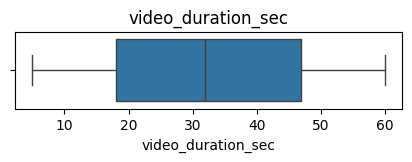

In [14]:
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=df['video_duration_sec'])

Text(0.5, 1.0, 'Video duration histogram')

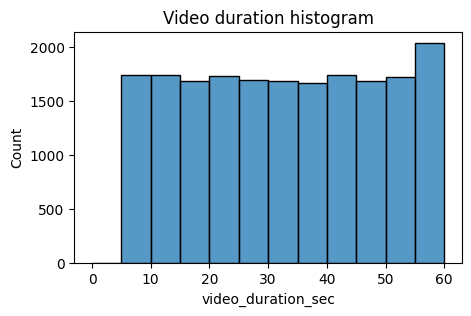

In [22]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram')

Text(0.5, 1.0, 'Video view count histogram')

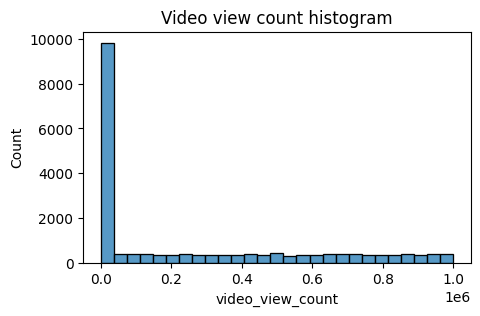

In [28]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_view_count'])
plt.title('Video view count histogram')

Text(0.5, 1.0, 'Video like count histogram')

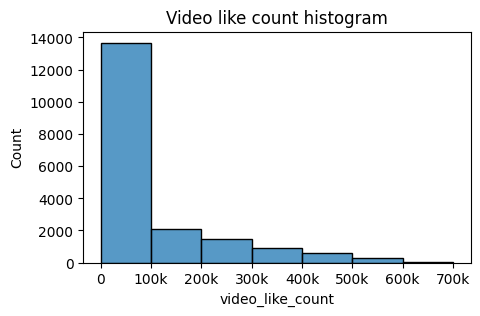

In [29]:
plt.figure(figsize=(5,3))
ax = sns.histplot(df['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram')

Text(0.5, 1.0, 'Video comment count histogram')

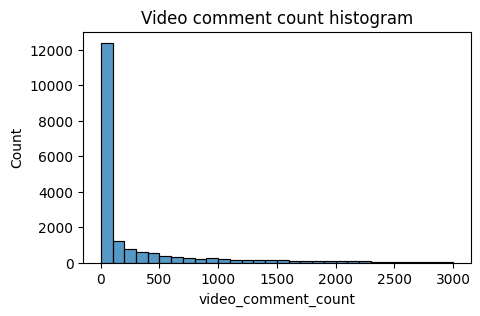

In [30]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram')

Text(0.5, 1.0, 'Video share count histogram')

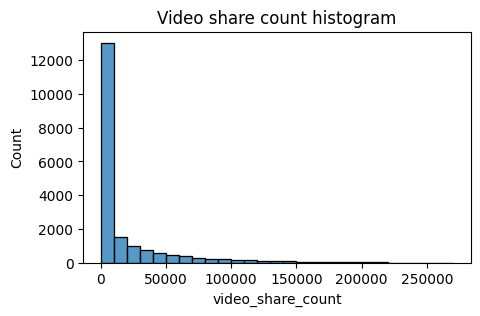

In [31]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram')

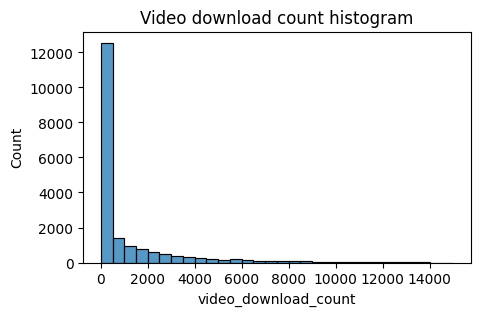

In [32]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram');

/tmp/ipykernel_3718/3271832200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_status_counts.index, y=claim_status_counts.values, palette="viridis")


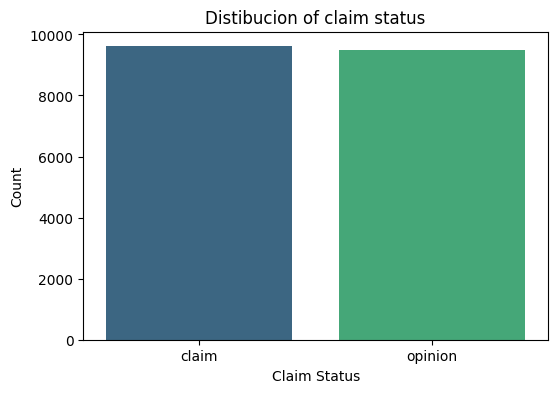

In [15]:
claim_status_counts = df['claim_status'].value_counts()


plt.figure(figsize=(6, 4))
sns.barplot(x=claim_status_counts.index, y=claim_status_counts.values, palette="viridis")
plt.title('Distibucion of claim status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_3718/2629897931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verified_status_counts.index, y=verified_status_counts.values, palette="coolwarm")


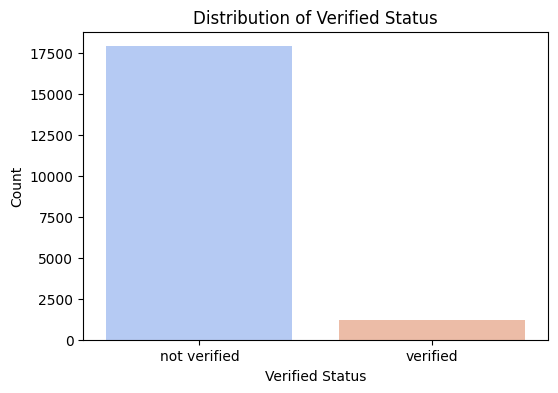

In [16]:
verified_status_counts = df['verified_status'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=verified_status_counts.index, y=verified_status_counts.values, palette="coolwarm")
plt.title('Distribution of Verified Status')
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_3718/1419969853.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ban_status_counts.index, y=ban_status_counts.values, palette="coolwarm")


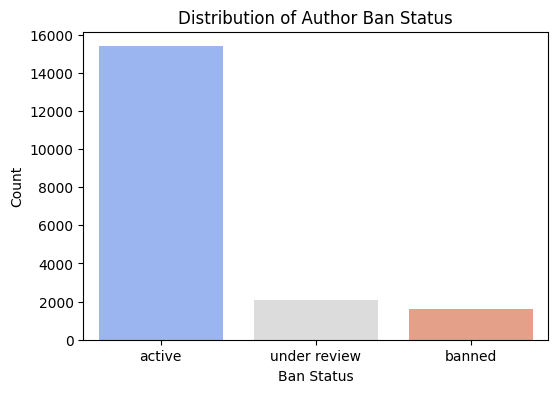

In [17]:
ban_status_counts = df['author_ban_status'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=ban_status_counts.index, y=ban_status_counts.values, palette="coolwarm")
plt.title('Distribution of Author Ban Status')
plt.xlabel('Ban Status')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Claims by verification status histogram')

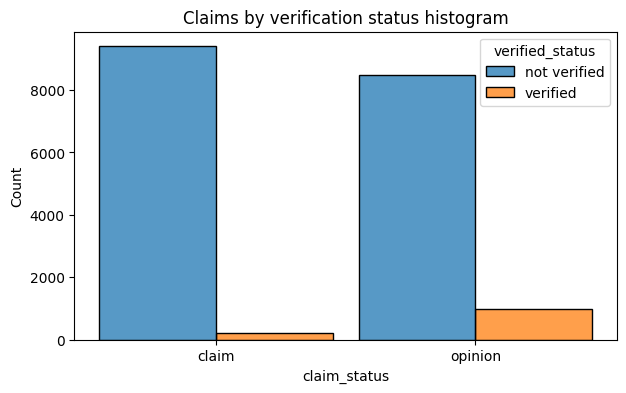

In [23]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram')

Text(0.5, 1.0, 'Claim status by author ban status - counts')

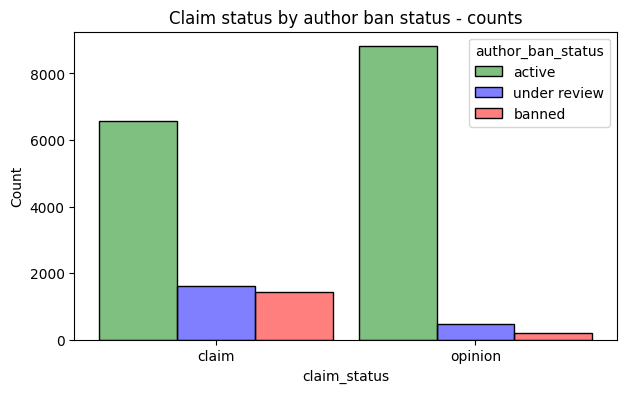

In [25]:
fig = plt.figure(figsize=(7,4))
sns.histplot(df, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'blue', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts')

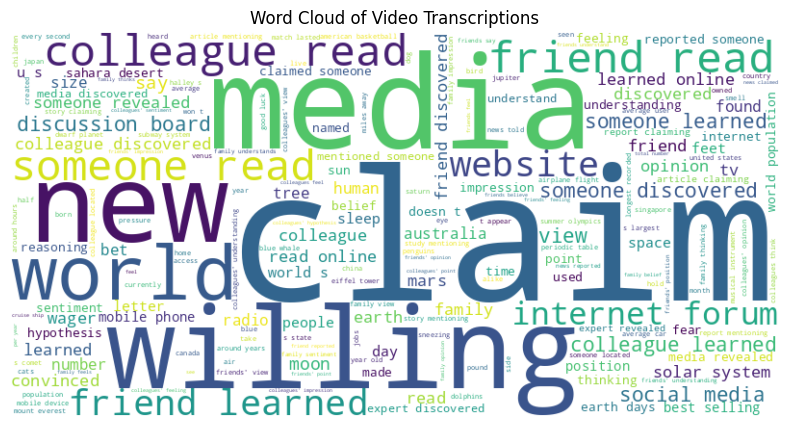

In [39]:
text = ' '.join(df['video_transcription_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Transcriptions')
plt.show()

In [47]:
df_like = df.sort_values(by='video_like_count', ascending=False)
df_view = df.sort_values(by='video_view_count', ascending=False)
df_comment = df.sort_values(by='video_comment_count', ascending=False)
df_share = df.sort_values(by='video_share_count', ascending=False)

<Axes: xlabel='video_id', ylabel='video_share_count'>

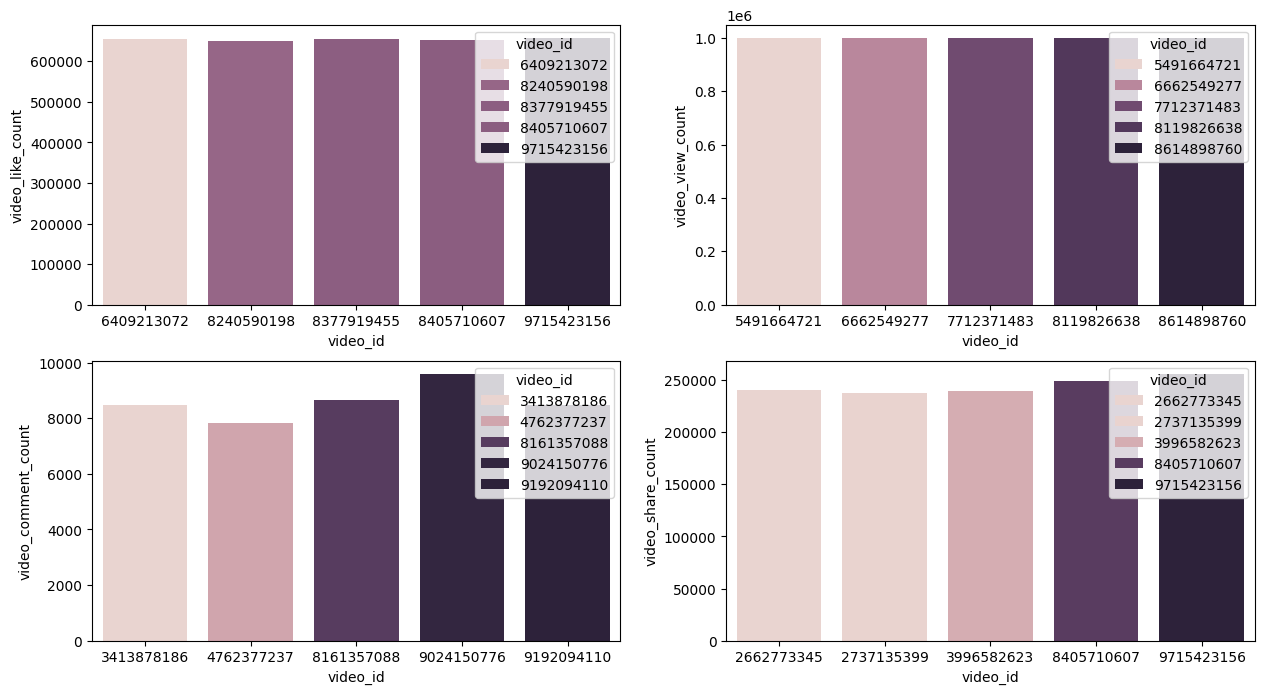

In [53]:
plt.figure(figsize = (15, 8))

plt.subplot(2, 2, 1)  
sns.barplot(x='video_id', y='video_like_count', data=df_like.head(5), hue='video_id')

plt.subplot(2, 2, 2)  
sns.barplot(x='video_id', y='video_view_count', data=df_view.head(5), hue='video_id')

plt.subplot(2, 2, 3)  
sns.barplot(x='video_id', y='video_comment_count', data=df_comment.head(5), hue='video_id') 

plt.subplot(2, 2, 4)  
sns.barplot(x='video_id', y='video_share_count', data=df_share.head(5), hue='video_id')

